# 无监督学习的类型
本文主要讨论两种类型的无监督学习：**数据变换与聚类**
数据集的**无监督变换（unsupervised transformation）**是创建数据新的表示的算法，与数据的原始表示相比，新的表示可能更容易被人或其他机器学习算法所理解。无监督变换的一个常见应用是降维（dimensionality reduction）,它接受包含许多特征的数据的高维表示，并找到表示该数据的一种新方法，用较少的特征就可以概括其重要特性。降维的一个常见应用是为了可视化将数据降为二维。  
无监督变换的另一种应用是找到“构成”数据的各个组成部分。这方面的一个例子就是对文本文档集合进行主题提取。这里的任务是找到每个文档中讨论的未知主题，并学习每个文档中出现了哪些主题。这可以用于追踪社交媒体上的话题讨论，比如选举、枪支管制或流行歌手等话题。  
与之相反，**聚类算法（clustering algorithm）**将数据划分成不同的组，每组包含相似的物项。

# 无监督学习的挑战
无监督学习的一个主要挑战就是评估算法是否学到了有用的东西。无监督学习算法一般用于不包含任何标签值得数据，所以我们不知道正确的输出应该是什么。因此很难判断一个模型是否“表现良好”。例如，假设我们的聚类算法已经将所有的侧脸照片和所有的正面照片进行分组。这肯定是人脸照片集合的一种可能的划分方法，但并不是我们想要的那种方法。然而，我们没有办法“告诉”算法我们要的是什么，通常来说，评估无监督算法结果的一种方法就是人工检查。  
因此，如果数据科学家想要更好地理解数据，那么无监督算法通常可以用于探索性的目的，而不是作为大型自动化系统的一部分。无监督算法的另一个常见应用是作为监督算法的预处理步骤。学习数据的一种新表示，有时可以提高监督算法的精度，或者作为减少内存占用和时间开销。    
在开始学习“真正的”无监督算法之前，我们先简要讨论几种简单又常用的预处理方法。

# 预处理与缩放
一些算法（如神经网络和SVM）对数据缩放非常敏感。因此，通常的做法是对特征进行调节，使数据表示更适合于这些算法。通常来说，这是对数据的一种简单的按特征的缩放和移动：

In [1]:
import sys
print("Python version:{}".format(sys.version))

import pandas as pd
print("pandas version:{}".format(pd.__version__))

import matplotlib
print("matplotlib version:{}".format(matplotlib.__version__))
import matplotlib.pyplot as plt

import numpy as np
print("Numpy version:{}".format(np.__version__))

import scipy as sp
print("Scipy version:{}".format(sp.__version__))

import IPython
print("IPython version:{}".format(IPython.__version__))

import sklearn
print("scikit-learn version:{}".format(sklearn.__version__))

import mglearn
import graphviz

Python version:3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
pandas version:0.23.4
matplotlib version:3.0.2
Numpy version:1.15.4
Scipy version:1.1.0
IPython version:7.2.0
scikit-learn version:0.20.1


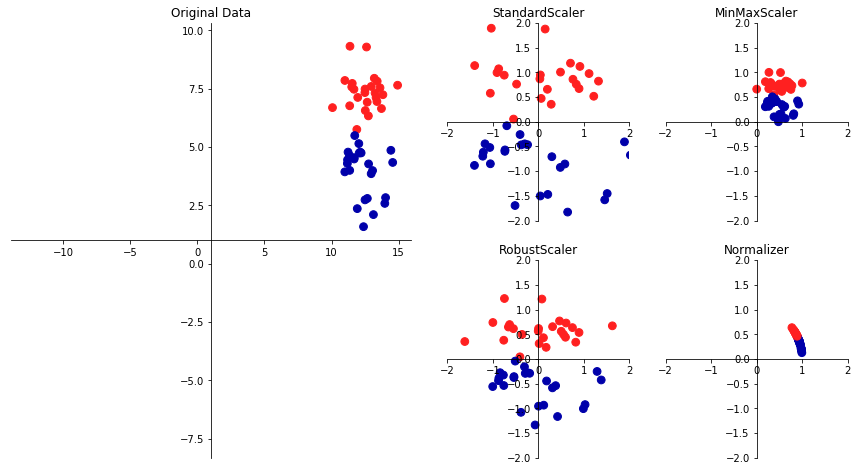

In [2]:
mglearn.plots.plot_scaling()

上图就是对数据集缩放和预处理的各种方法。第一张图显示的是一个模拟的有两个特征的二分类数据集。第一个特征（x轴）位于10到15之间。第二个特征（y轴）大约位于1到9之间。接下来的4张图展示了4种数据变换方法，都生成了更加标准的范围。scikit-learn中的StandardScaler确保每个特征的平均值为0、方差为1，使所有特征都位于同一量级。但这种缩放不能保证特征任何特定的最大值和最小值。RobustScaler的工作原理与StandardScaler类似，确保每个特征的统计属性都位于同一范围。但RobustScaler使用的是中位数和四分位数，而不是平均值和方差。这样RobustScaler会忽略与其他点有很大不同的数据点（比如测量误差）。这些与众不同的数据点也叫异常值（outlier），可能会给其他缩放方法造成麻烦。  
与之相反，MinMaxScaler移动数据，使所有特征都刚好位于0到1之间。对于二维数据集来说，所有的数据都包含在x轴0到1与y轴0到1组成的矩形中。  
最后,Normalizer用到一种完全不同的缩放方法。它对每个数据点进行缩放，使得特征向量的欧式长度等于1。换句话说，它将一个数据点投射到半径为1的圆上（对于更高维度的情况，是球面）。这意味着每个数据点的缩放比例都不相同（乘以其长度的倒数）。如果只有数据的方向（或角度）是重要的，而特征向量的长度无关紧要，那么通常会使用这种归一化。

# 应用数据变换
我们将核SVM（SVC）应用在cancer数据集上，需要使用MinMaxScaler来预处理数据。首先加载数据集并将其分为训练集和测试集：

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


我们首先导入实现预处理的类，然后将其实例化：

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

然后，使用fit方法拟合缩放器(scaler)，并将其应用于训练集。对于MinMaxScaler来说，fit方法计算训练集中每个特征的最大值和最小值：

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

为了应用刚刚学习的变换（即对训练数据进行实际缩放），我们使用缩放器的transform方法。在scikit-learn中，每当模型返回数据的一种新表示时，都可以使用transform方法：

In [6]:
# 变换数据
X_train_scaled=scaler.transform(X_train)
# 在缩放之前和之后分别打印数据集属性
print("transformed shape:{}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n{}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n{}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n{}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_train_scaled.max(axis=0)))

transformed shape:(426, 30)
per-feature minimum before scaling:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


变换后的数据形状与原始数据相同，特征只是发生了移动和缩放。你可以看到，现在所有特征都位于0和1之间，这也符合我们的预期。  
为了将SVM应用到缩放后的数据上，还需要对测试集进行变换。这可以通过对X_test调用transform方法来完成：

In [7]:
# 对测试集数据进行变换
X_test_scaled=scaler.transform(X_test)
# 在缩放之后打印测试数据的属性
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


你可以发现，对测试集缩放后的最大值和最小值不是1和0，这或许有些出乎意料。有些特征甚至在0~1的范围之外！对此的解释是，MinMaxScaler（以及其他缩放器）总是对训练集和测试集应用完全相同的变换。也就是说，transform方法总是减去训练集的最小值，然后除以训练集的范围，而这两个值可能与测试集的最小值和范围并不相同。

# 对训练集和测试数据集进行相同的缩放
为了让监督模型能够在测试集上运行，对训练集和测试集应用完全相同的变换是很重要的。如果我们使用测试集的最大值和最小值，我们看下会发生什么：

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

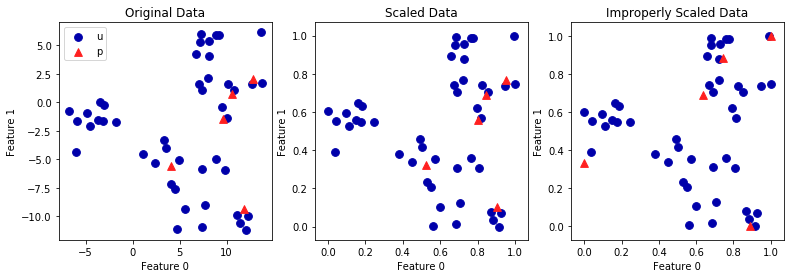

In [8]:
from sklearn.datasets import make_blobs

# 构造数据
X,_=make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)
# 将其分为训练集和测试集
X_train,X_test=train_test_split(X,random_state=5,test_size=.1)

#绘制训练集和测试集
fig,axes=plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],marker='^',c=mglearn.cm2(1),label="Test set",s=60)
axes[0].legend("upper left")
axes[0].set_title("Original Data")

# 利用MinMaxScaler缩放数据
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 将正确缩放的数据可视化
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],marker='^',c=mglearn.cm2(1),label="Test set",s=60)
axes[1].set_title("Scaled Data")

# 单独对数据集进行缩放
# 使得测试集的最小值为0，最大值为1
# 千万不要这么做！这里只是为了举例
test_scaler=MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaler_badly=test_scaler.transform(X_test)

# 将错误缩放的数据可视化
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[2].scatter(X_test_scaler_badly[:,0],X_test_scaler_badly[:,1],marker='^',c=mglearn.cm2(1),label="Test set",s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

第一张图示未缩放的二维数据集，其中训练集使用椭圆表示，测试集用三角形表示，第二张图中是同样的数据，但使用MinMaxScaler缩放。这里我们调用fit作用在训练集上，然后调用transformat作用在训练集和测试集上。你可以发现，第二张图中的数据集看起来与第一张图中的完全相同，只是坐标轴刻度发生了变化。现在所有特征都位于0和1之间。你还可以发现，测试数据（三角形）的特征最大值和最小值并不是1和0。  
第三张图展示了如果我们对训练集和测试集分别进行缩放会发生什么。在这种情况下，对训练集和测试集而言，特征的最大值和最小值都是1和0。但现在数据集看起来不一样。测试集相对训练集的移动不一致，因为它们分别做了不同的缩放。我们随意改变了数据的排列。这显然不是我们想要做的事情。  
再换一种思考方式，想象你的测试集只有一个点。对于一个点而言，无法将其正确地缩放以满足MinMaxScaler的最大值和最小值的要求。但是测试集的大小不应该对你的处理方式有影响。

# 预处理对监督学习的作用
现在回到cancer数据集，观察使用MinMaxScaler对学习SVC的作用。首先，为了对比，我们再次在原始数据上拟合SVC：

In [9]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
svm=SVC(C=100)
svm.fit(X_train,y_train)
print("Test set accuracy:{:.2f}".format(svm.score(X_test,y_test)))

Test set accuracy:0.63


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


下面先用MinMaxScaler对数据进行缩放，然后再拟合SVC:

In [10]:
# 使用0-1缩放进行预测
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 在缩放后的训练数据上学习SVM
svm.fit(X_train_scaled,y_train)
# 在缩放后的数据集上计算分数
print("Scaled test set accuracy:{:.2f}".format(svm.score(X_test_scaled,y_test)))

Scaled test set accuracy:0.97


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


正如我们上面所见，数据缩放的作用非常显著。虽然数据缩放不涉及任何复杂的数学，但良好的做法仍然是使用scikit-learn提供的缩放机制，而不是自己重新实现它们，因为即使你在这些点的计算中也容易犯错。  
你也可以通过改变使用的类将一种预处理算法轻松替换成另一种，因为所有的预处理都具有相同的接口，都包含fit和transform方法：

In [11]:
# 利用零均值和单位方差的缩放方法进行预处理
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 在缩放后的训练数据上学习SVM
svm.fit(X_train_scaled,y_train)
# 在缩放后的数据集上计算分数
print("SVM test set accuracy:{:.2f}".format(svm.score(X_test_scaled,y_test)))

SVM test set accuracy:0.96


# 降维、特征提取与流形学习
利用无监督学习进行数据变换可能有很多种目的。最常见的目的就是可视化、压缩数据，以及寻找信息量更大的数据表示以用于进一步的处理。  
为了实现这些目的，最简单也是最常用的一种算法就是主成分分析。我们也将学习另外两种算法：非负矩阵分解（NMF）和t-SNE,前者通常用于特征提取，后者通常用于二维散点图的可视化。  

## 主成分分析
主成分分析（principal component analysis,PCA）是一种旋转数据集的方法，旋转后的特征在统计上不相关。在做完这种旋转之后，通常是根据新特征对解释数据的重要性来选择它的一个子集。如下展示了对一个模拟二维数据集的作用：

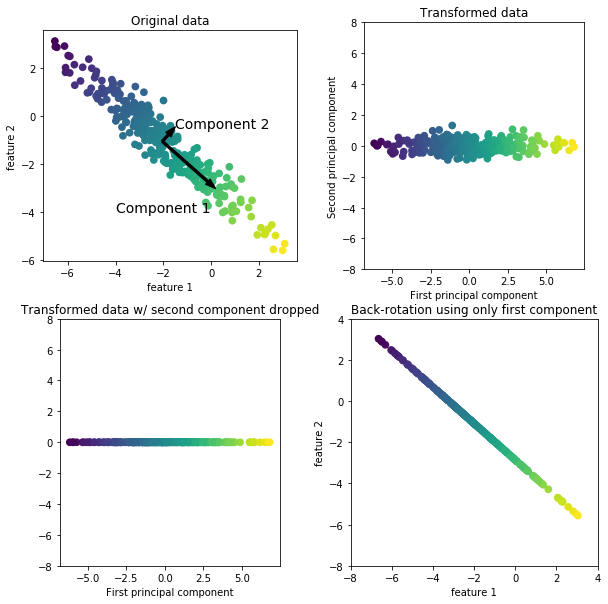

In [12]:
mglearn.plots.plot_pca_illustration()

第一张图（左上）显示的是原始数据点，用不同颜色加以区分。算法首先找到方差最大的方向，将其标记为“成分1”（Component 1）。这是数据中包含最多信息的方向（或向量），换句话说，沿着这个方向的特征之间最为相关。然后，算法找到与第一个方向正交（成直角）且包含最多信息的方向。在二维空间中，只有一个成直角的方向，但在更高维的空间中会有（无穷）多的正交方向。虽然这两个成分都画成箭头，但其头尾的位置并不重要。我们也可以将第一个成分画成从中心指向左上，而不是指向游侠。利用这一过程找到的方向称为主成分（principal component）,因为它们是数据方差的主要方向。一般来说，主成分的个数与原始特征相同。  
第二张图显示的是同样的数据，但现在将其旋转，使得第一主成分与x轴平行且第二主成分与y轴平行。在旋转之前，从数据中减去平均值，使得变换后的数据以零为中心。在PCA找到的旋转表示中，两个坐标轴是不相关的，也就是说，对于这种数据表示，除了对角线，相关矩阵全部为零。   
我们可以通过仅保留一部分主成分来使用PCA进行降维。在这个例子中，我们可以仅保留第一个主成分，正如第三张图所示（左下）。这将数据从二维数据降为一维数据集。但要注意，我们没有保留原始特征之一，而是找到了最有趣的分析（第一张图中从左上到右下）并保留这一方向，即第一主成分。  
最后，我们可以反向旋转并将平均值重新加到数据中。这样会得到上面最后一张图的数据。这些数据点位于原始特征空间中，但我们仅保留了第一主成分中包含的信息。这种变换有时用于去除数据中的噪声影响，或者将主成分中保留的那部分信息可视化。

## 将主成分应用于cancer数据集并可视化
PCA最常见的应用之一就是将高维数据集可视化。对于两个以上特征的数据，很难绘制散点图。对于Iris（鸢尾花）数据集，我们可以创建散点图矩阵，通过展示特征所有可能的两两组合来表示数据的局部图像。但如果我们想要查看乳腺癌数据集，即使用散点图矩阵也很困难。这个数据集包含30个特征，这就导致需要绘制30*14=420张散点图！我们永远不可能仔细观察所有这些图像，更不用说试图理解它们了。  
不过我们可以使用一种更简单的可视化方法———对每个特征分别计算两个类别（良性肿瘤和恶性肿瘤）的直方图：

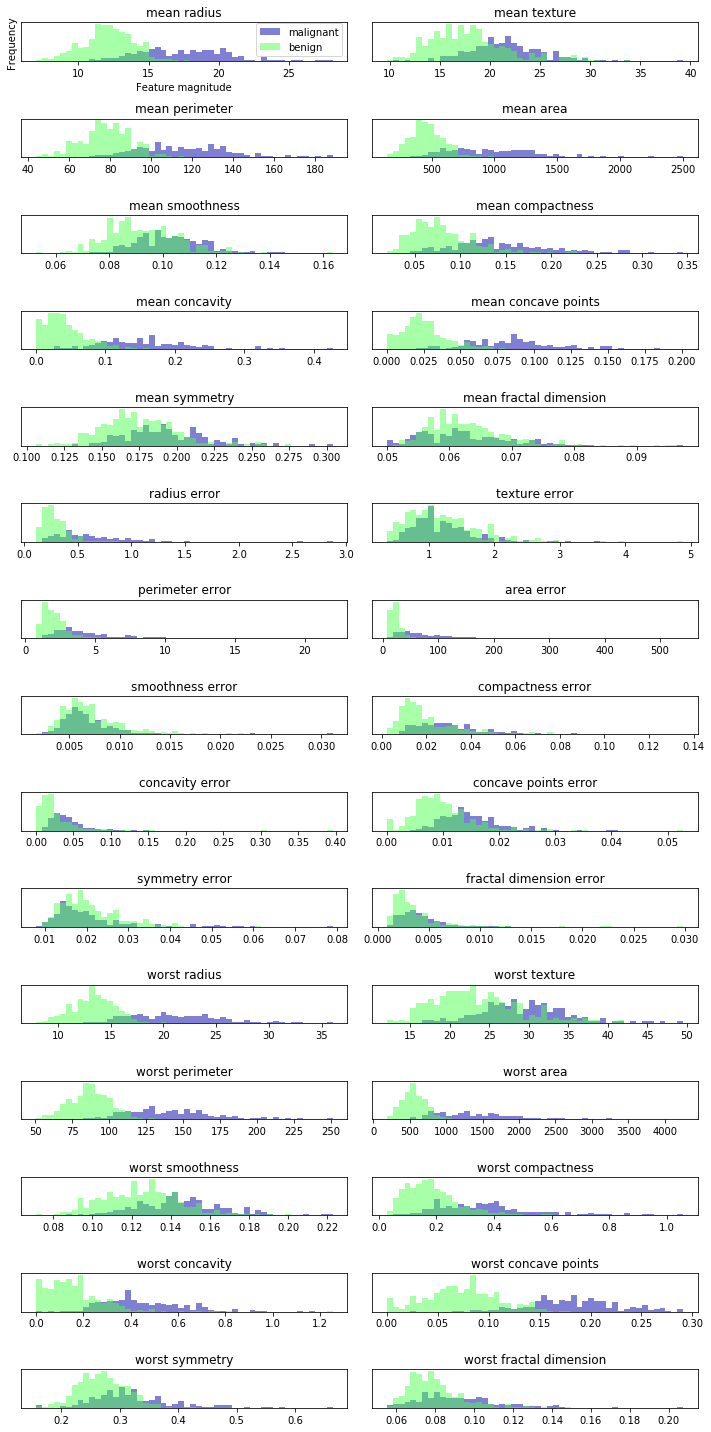

In [13]:
fig,axes=plt.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

for  i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()

这里我们为每个特征创建一个直方图，计算具有某一特征的数据点在特定范围内（叫作bin）的出现概率。每张图都包含两个直方图，一个是良性类别的所有点（蓝色），一个是恶性类别的所有点（红色）。这样我们可以了解每个特征在两个类别中的分布情况，也可以猜测哪些特征能够更好地区分良性样本和恶性样本。例如，“smoothness error”特征似乎没有什么信息量，因为两个直方图大部分都重叠在一起，而“worst concave points”特征看起来信息量相当大，因为两个直方图的交集很小。  
但是，这种图无法向我们展示变量之间的相互作用以及这种相互作用与类别之间的关系。利用PCA,我们可以获取到主要的相互作用，并得到稍微完整的图像。我们可以找到前两个主成分，并在这个新的二维空间中利用散点图将数据可视化。  
在应用PCA之前，我们利用StandardScaler缩放数据，使每个特征的方差均为1：

In [14]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

学习并应用PCA变换与应用预处理变换一样简单。我们将PCA对象实例化，调用fit方法找到主成分，然后调用transform来旋转并降维。默认情况下，PCA仅旋转（并移动）数据，但保留所有的主成分。为了降低数据的维度，我们需要在创建PCA对象时指定想要保留的主成分个数：

In [15]:
from sklearn.decomposition import PCA

# 保留数据的前两个主成分
pca=PCA(n_components=2)
# 对乳腺癌数据拟合PCA模型
pca.fit(X_scaled)

# 将数据变换到前两个主成分的方向上
X_pca=pca.transform(X_scaled)
print("Original shape:{}".format(str(X_scaled.shape)))
print("Reduced shape:{}".format(str(X_pca.shape)))

Original shape:(569, 30)
Reduced shape:(569, 2)


现在我们可以对前两个主成分作图：

Text(0, 0.5, 'Second principal component')

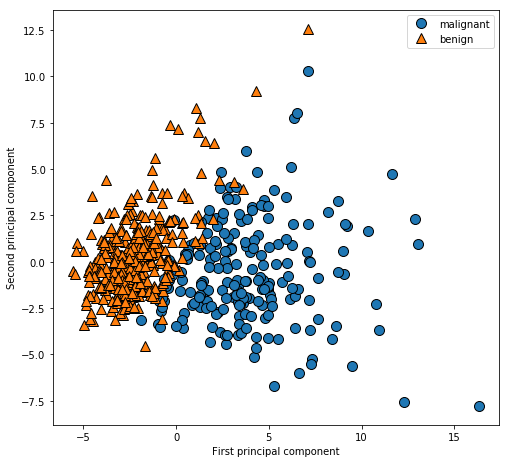

In [16]:
# 对第一个和第二个主成分作图，按类别着色
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

重要的是要注意，PCA是一种无监督方法，，在寻找旋转方向时没有用到任何类别信息。它只是观察数据中的相关性。对于这里所示的散点图，我们绘制了第一主成分与第二主成分的关系，然后利用类别信息对数据点进行着色。你可以看到，在这个二维空间中两个类别被很好地分离。这让我们相信，即使是线性分类器（在这个空间中学习一条直线）也可以在区分这两个类别时表现得相当不错。我们还可以看到，恶性点比良性点更加分散，这一点也可以之前的直方图中看出来。  
PCA的一个缺点在于，通常不容易对图中的两个轴做出解释。主成分对应于原始数据中的方向，所以它们是原始特征的组合。但这些组合往往非常复杂，这一点我们很快就会看到。在拟合过程中，主成分被保留在PCA对象的components_属性中：

In [17]:
print("PCA component shape:{}".format(pca.components_.shape))

PCA component shape:(2, 30)


components_的每一行对应于一个主成分，它们按重要性（第一主成分排在首位，以此类推）。列对应于PCA的原始特征属性，在本例中即为“mean radius”“mean texture”等。我们来看一下components_的内容：

In [18]:
print("PCA component:\n{}".format(pca.components_))

PCA component:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


我们还可以用热图将系数可视化，这可能更容易理解：

Text(0, 0.5, 'Principal components')

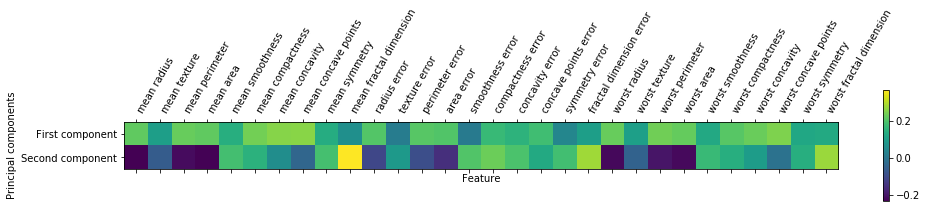

In [19]:
plt.matshow(pca.components_,cmap="viridis")
plt.yticks([0,1],["First component","Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha="left")
plt.xlabel("Feature")
plt.ylabel("Principal components")

你可以看到，在第一个主成分中，所有特征的符号相同（均为正，但前面我们提到过，箭头指向哪个方向无关紧要）。这意味着在所有特征之间存在普遍的相关性。如果一个测量值较大的话，其他的测量值可能也较大。第二个主成分的符号有正有负，而且两个主成分都包含所有30个特征。这种所有特征的混合使得解释上图中的坐标轴变的十分困难。

## 特征提取的特征脸
PCA的另一个应用是特征提取。特征提取背后的思想是，可以找到一种数据表示，比给定的原始表示更适合于分析。特征提取很有用，它的一个很好的应用实例就是图像。图像由像素组成，通常存储为红绿蓝（RGB）强度。图像中的对象通常由上千个像素组成，它们只有放在一起才有意义。  
我们将给出用PCA对图像做特征提取的一个简单应用，即处理Wild数据集Labeled Faces（标记人脸）中的人脸图像。这一数据集包含从互联网下载的名人脸部图像，它包含从21世纪初开始的政治家、歌手、演员和运动员的人脸图像。我们使用这些图像的灰度版本，并将它们按比例缩小以加快处理速度：

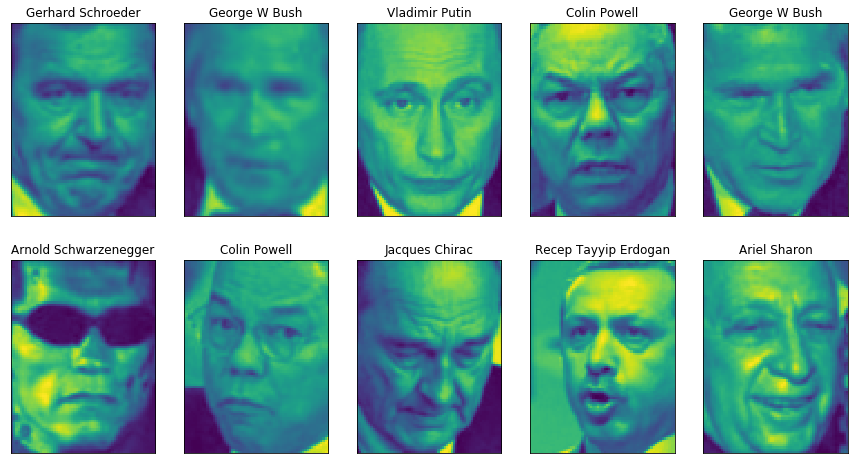

In [20]:
from sklearn.datasets import fetch_lfw_people

people=fetch_lfw_people(min_faces_per_person=25,resize=0.7)
image_shape=people.images[0].shape

fix,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})

for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

一共有2588张图像，每张大小为87像素*65像素，分别属于62个不同的人：

In [32]:
print("people.images.shape:{}".format(people.images.shape))
print("Number of classes:{}".format(people.target_names))

people.images.shape:(2588, 87, 65)
Number of classes:['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Bill Clinton' 'Colin Powell' 'David Beckham'
 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gray Davis' 'Guillermo Coria' 'Hans Blix'
 'Hugo Chavez' 'Jack Straw' 'Jacques Chirac' 'Jean Chretien'
 'Jennifer Capriati' 'John Ashcroft' 'John Negroponte'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva' 'Mahmoud Abbas'
 'Megawati Sukarnoputri' 'Nestor Kirchner' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Serena Williams'
 'Silvio Berlusconi' 'Tom Daschle' 'Tom Ridge' 'Tony Blair' 'Vicente Fox'
 'Vladimir Putin']


但这个数据有些倾斜，其中包含George W.Bush（小布什）和Coin Powell(科林.鲍威尔）的大量图像，正如你在下面所见：

In [22]:
# 计算每个目标出现的次数
counts=np.bincount(people.target)
# 将次数与目标名称一起打印出来
for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25} {1:3}".format(name,count),end=' ')
    if (i+1)%3==0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Andre Agassi               36 
Ariel Sharon               77 Arnold Schwarzenegger      42 Bill Clinton               29 
Colin Powell              236 David Beckham              31 Donald Rumsfeld           121 
George W Bush             530 Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 
Gray Davis                 26 Guillermo Coria            30 Hans Blix                  39 
Hugo Chavez                71 Jack Straw                 28 Jacques Chirac             52 
Jean Chretien              55 Jennifer Capriati          42 John Ashcroft              53 
John Negroponte            31 Juan Carlos Ferrero        28 Junichiro Koizumi          60 
Kofi Annan                 32 Laura Bush                 41 Lleyton Hewitt             41 
Luiz Inacio Lula da Silva  48 Mahmoud Abbas              29 Megawati Sukarnoputri      33 
Nestor Kirchner            37 Recep Tayyip Erdogan       30 Ricardo Lagos              27 

为了降低数据倾斜，我们对每个人最多只取50张图像（否则，特征提取将会被George W.Bush的可能性大大影响）：

In [23]:
mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
    
X_people=people.data[mask]
y_people=people.target[mask]

# 将灰度值缩放到0和1之间，而不是在0和255之间
# 以得到更好的数据稳定性
X_people=X_people/255

人脸识别的一个常见任务就是某个前所未见的人脸是否属于数据库中的某个已知人物。  
这在照片收集、社交媒体和安全应用中都有应用。解决这个问题的方法之一就是构建一个分类器，每个人都是一个单独的类别。但人脸数据库中通常由许多不同的人，而同一个人的图像很少（也就是说，每个类别的训练样例很少）。这使得大多数分类器的训练都很困难。另外，通常你还想要能够轻松添加新的人物，不需要重新训练一个大型模型。

一种简单的解决办法是使用单一最近邻分类器，寻找与你要分类的人脸最为相似的人脸。这个分类器原则上可以处理每个类别只有一个训练样例的情况。下面看一下KNeighborsClassifier的表现如何：

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# 将数据分为训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)
# 使用一个邻居构建KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("Test set score of 1-nn:{:.2f}".format(knn.score(X_test,y_test)))

Test set score of 1-nn:0.27


我们得到的精度为27%。对于包含62个类别的分类问题来说，这实际上不算太差（随机猜测的精度约为1/62=1.5%），但也不算好。我们每识别四次仅正确识别了一个人。  
这里就可以用到PCA。想要度量人脸的相似度 ，计算原始像素空间中的距离是一种相当糟糕的方法。用像素表示来比较两张图像时，我们比较的是每个像素的灰度值与另一张图像对应位置的像素灰度值。这种表示与人们对人脸图像的解释方式有很大不同，使用这种原始表示很难获取面部特征。例如，如果使用像素距离，那么将人类向右移动一个像素将会发生巨大的变化，得到一个完全不同的表示。我们希望，使用沿着主成分方向的距离可以提高精度。这里我们启用PCA的白化（whitening）选项，它将主成分缩放到相同的尺度。变换后的结果与使用StandardScaler相同。再次使用之前图的数据，白化不仅对应于旋转数据，还对应于缩放数据使其形状是圆形而不是椭圆：

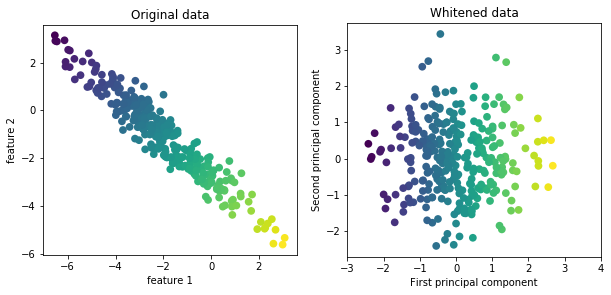

In [27]:
mglearn.plots.plot_pca_whitening()

我们对训练数据拟合PCA对象，并提取前100个主成分。然后对训练数据和测试数据进行变换：

In [28]:
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print("X_train_pca.shape:{}".format(X_train_pca.shape))

X_train_pca.shape:(1221, 100)


新数据有100个特征，即前100个主成分。现在，可以对新表示使用单一最近邻分类器来讲我们的图像分类：

In [31]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("Test set score of 1-nn:{:.2f}".format(knn.score(X_test_pca,y_test)))

Test set score of 1-nn:0.37


我们的精度有了相当显著的提高，从27%提升到37%，这证实了我们的直觉，即主成分可能提供了一种更好的数据表示。  
对于图像数据，我们还可以很容易地将找到的主成分可视化。请记住，成分对于输入空间里的方向。这里的输入空间是87像素 * 65像素的灰度图像，所以在这个空间中的方向也是87像素 * 65像素的灰度图像。  
我们来看一下前几个主成分：

In [32]:
print("pca.components_.shape:{}".format(pca.components_.shape))

pca.components_.shape:(100, 5655)


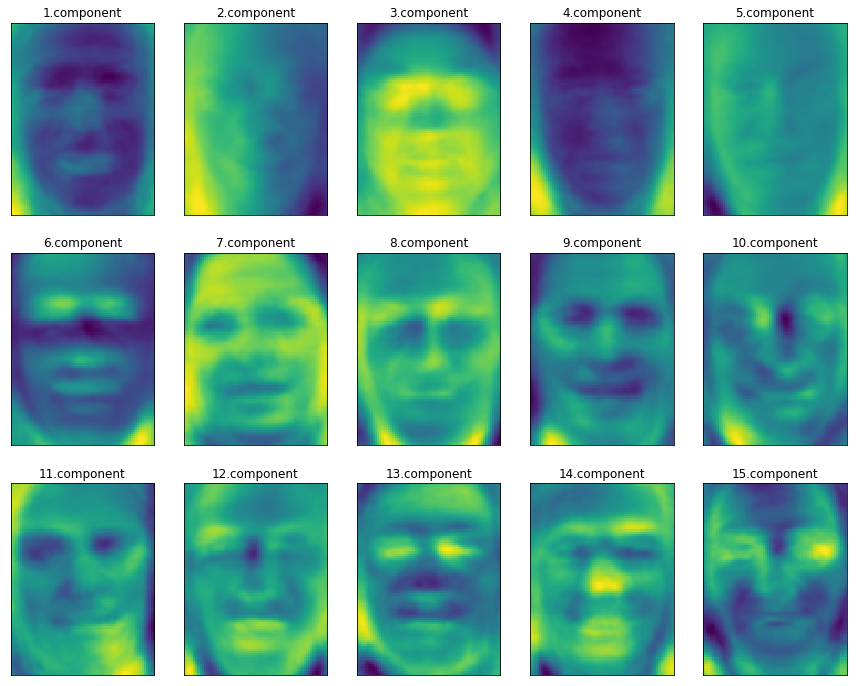

In [33]:
fix,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}.component".format((i+1)))

虽然我们肯定无法理解这些成分的所有内容，但可以猜测一些主成分捕捉到了人脸图像的哪些方面。第一个主成分似乎主要编码的是人脸与背景的对比，第二个主成分编码的是人左半部分和右半部分的明暗程度差异，如此等等。虽然这种表示比原始像素值的语义稍强，但它仍与人们感知人脸的方式相去甚远。由于PCA模型是基于像素的，因此人脸的相对位置（眼睛、下巴和鼻子的位置）和明暗程度都对两张图像在像素表示中的相似程度有很大影响。但人脸的相对位置和明暗程度可能并不是人们首先感知的内容。在要求人们评价人脸的相似度时，他们更可能会使用年龄、性别、面部表情和发型等属性，而这些属性很难从像素强度中推断出来。重要的是要记住，算法对数据（特别是视觉数据，比如人们非常熟悉的图像）的解释通常与人类的解释方式大不相同。